In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

## Dataset

In [37]:
df = pd.read_csv('/Users/adhityagopal/Documents/sem 7/fda/project/winequalityN.csv')
df.dropna(inplace=True)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


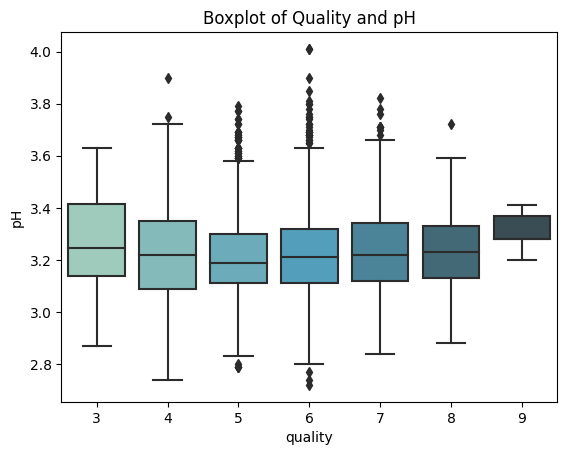

In [39]:
sns.boxplot(x='quality',y='pH',data=df,palette='GnBu_d')
plt.title("Boxplot of Quality and pH")
plt.show()

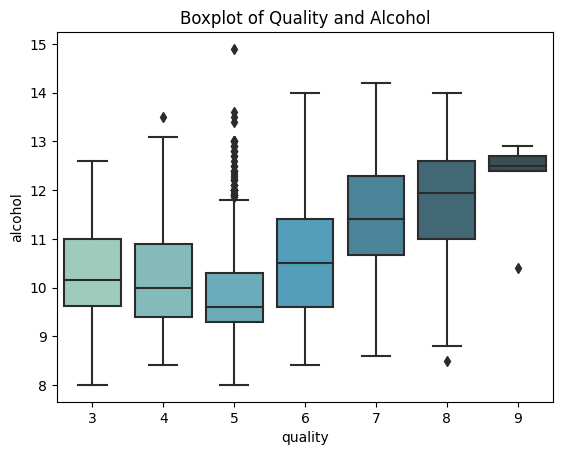

In [40]:
ax = sns.boxplot(x='quality',y='alcohol',data=df,palette='GnBu_d')
plt.title("Boxplot of Quality and Alcohol")
plt.show()

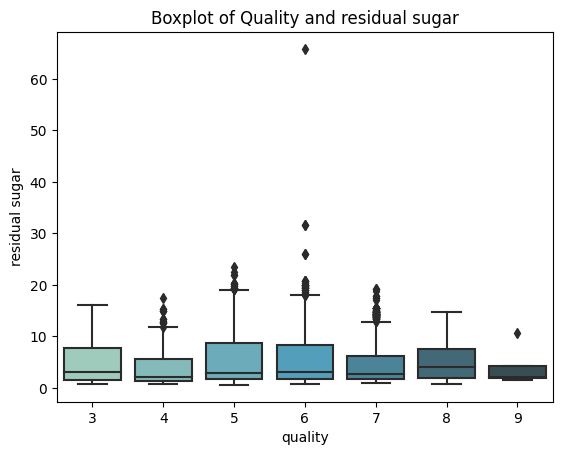

In [41]:
ax=sns.boxplot(x="quality",y="residual sugar",data=df,palette="GnBu_d")
plt.title("Boxplot of Quality and residual sugar")
plt.show()

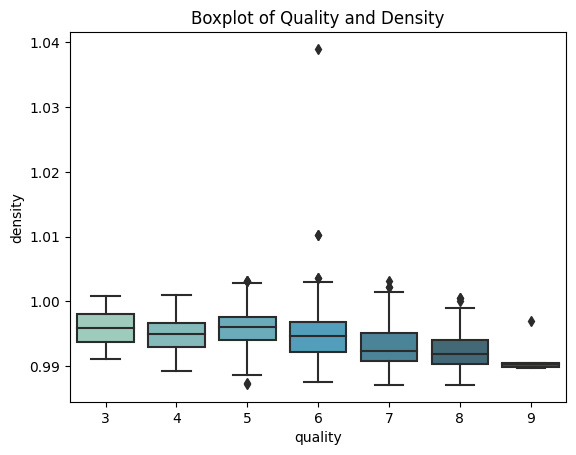

In [42]:
sns.boxplot(x="quality",y="density",data=df,palette="GnBu_d")
plt.title("Boxplot of Quality and Density")
plt.show()

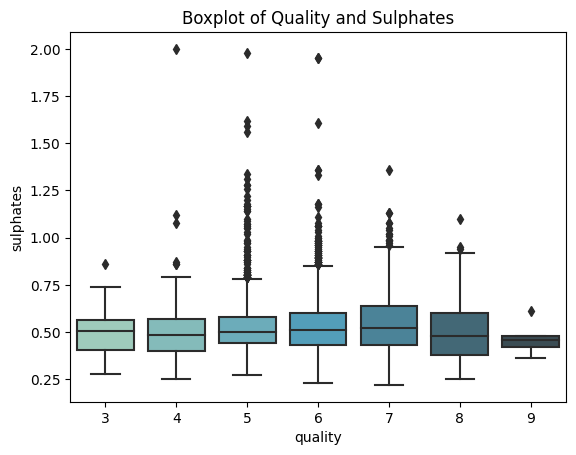

In [43]:
sns.boxplot(x="quality",y="sulphates",data=df,palette="GnBu_d")
plt.title("Boxplot of Quality and Sulphates")
plt.show()

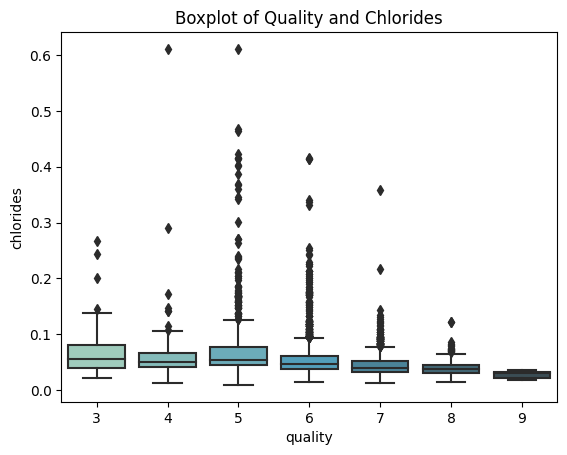

In [44]:
sns.boxplot(x="quality",y="chlorides",data=df,palette="GnBu_d")
plt.title("Boxplot of Quality and Chlorides")
plt.show()

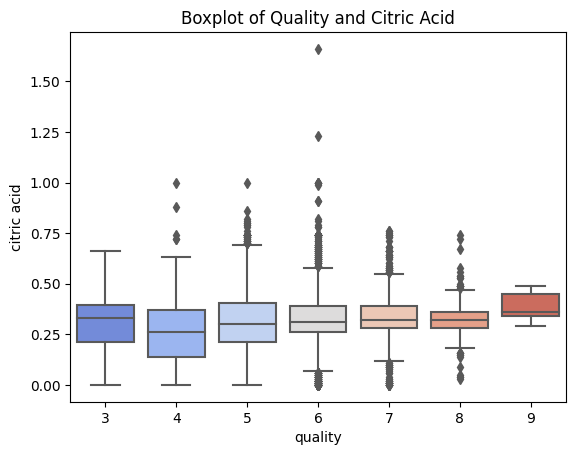

In [45]:
sns.boxplot(x="quality",y="citric acid",data=df,palette="coolwarm")
plt.title("Boxplot of Quality and Citric Acid")
plt.show()

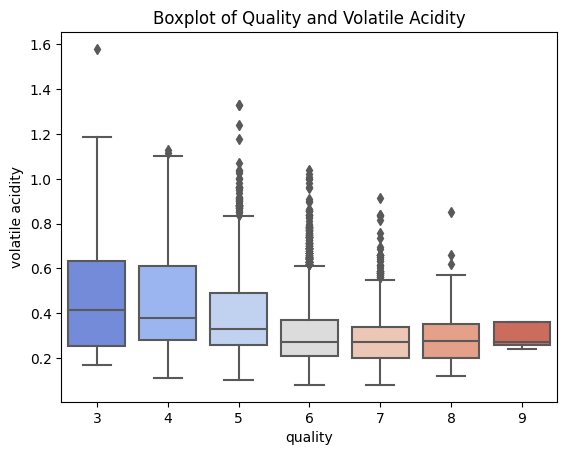

In [46]:
sns.boxplot(x="quality",y="volatile acidity",data=df,palette="coolwarm")
plt.title("Boxplot of Quality and Volatile Acidity")
plt.show()

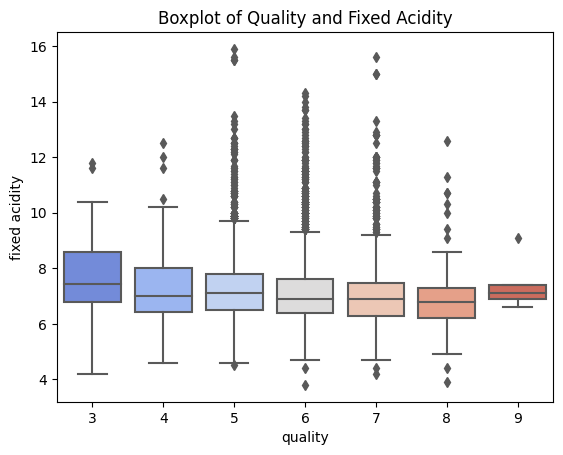

In [47]:
sns.boxplot(x="quality",y="fixed acidity",data=df,palette="coolwarm")
plt.title("Boxplot of Quality and Fixed Acidity")
plt.show()

IndexError: index 12 is out of bounds for axis 0 with size 12

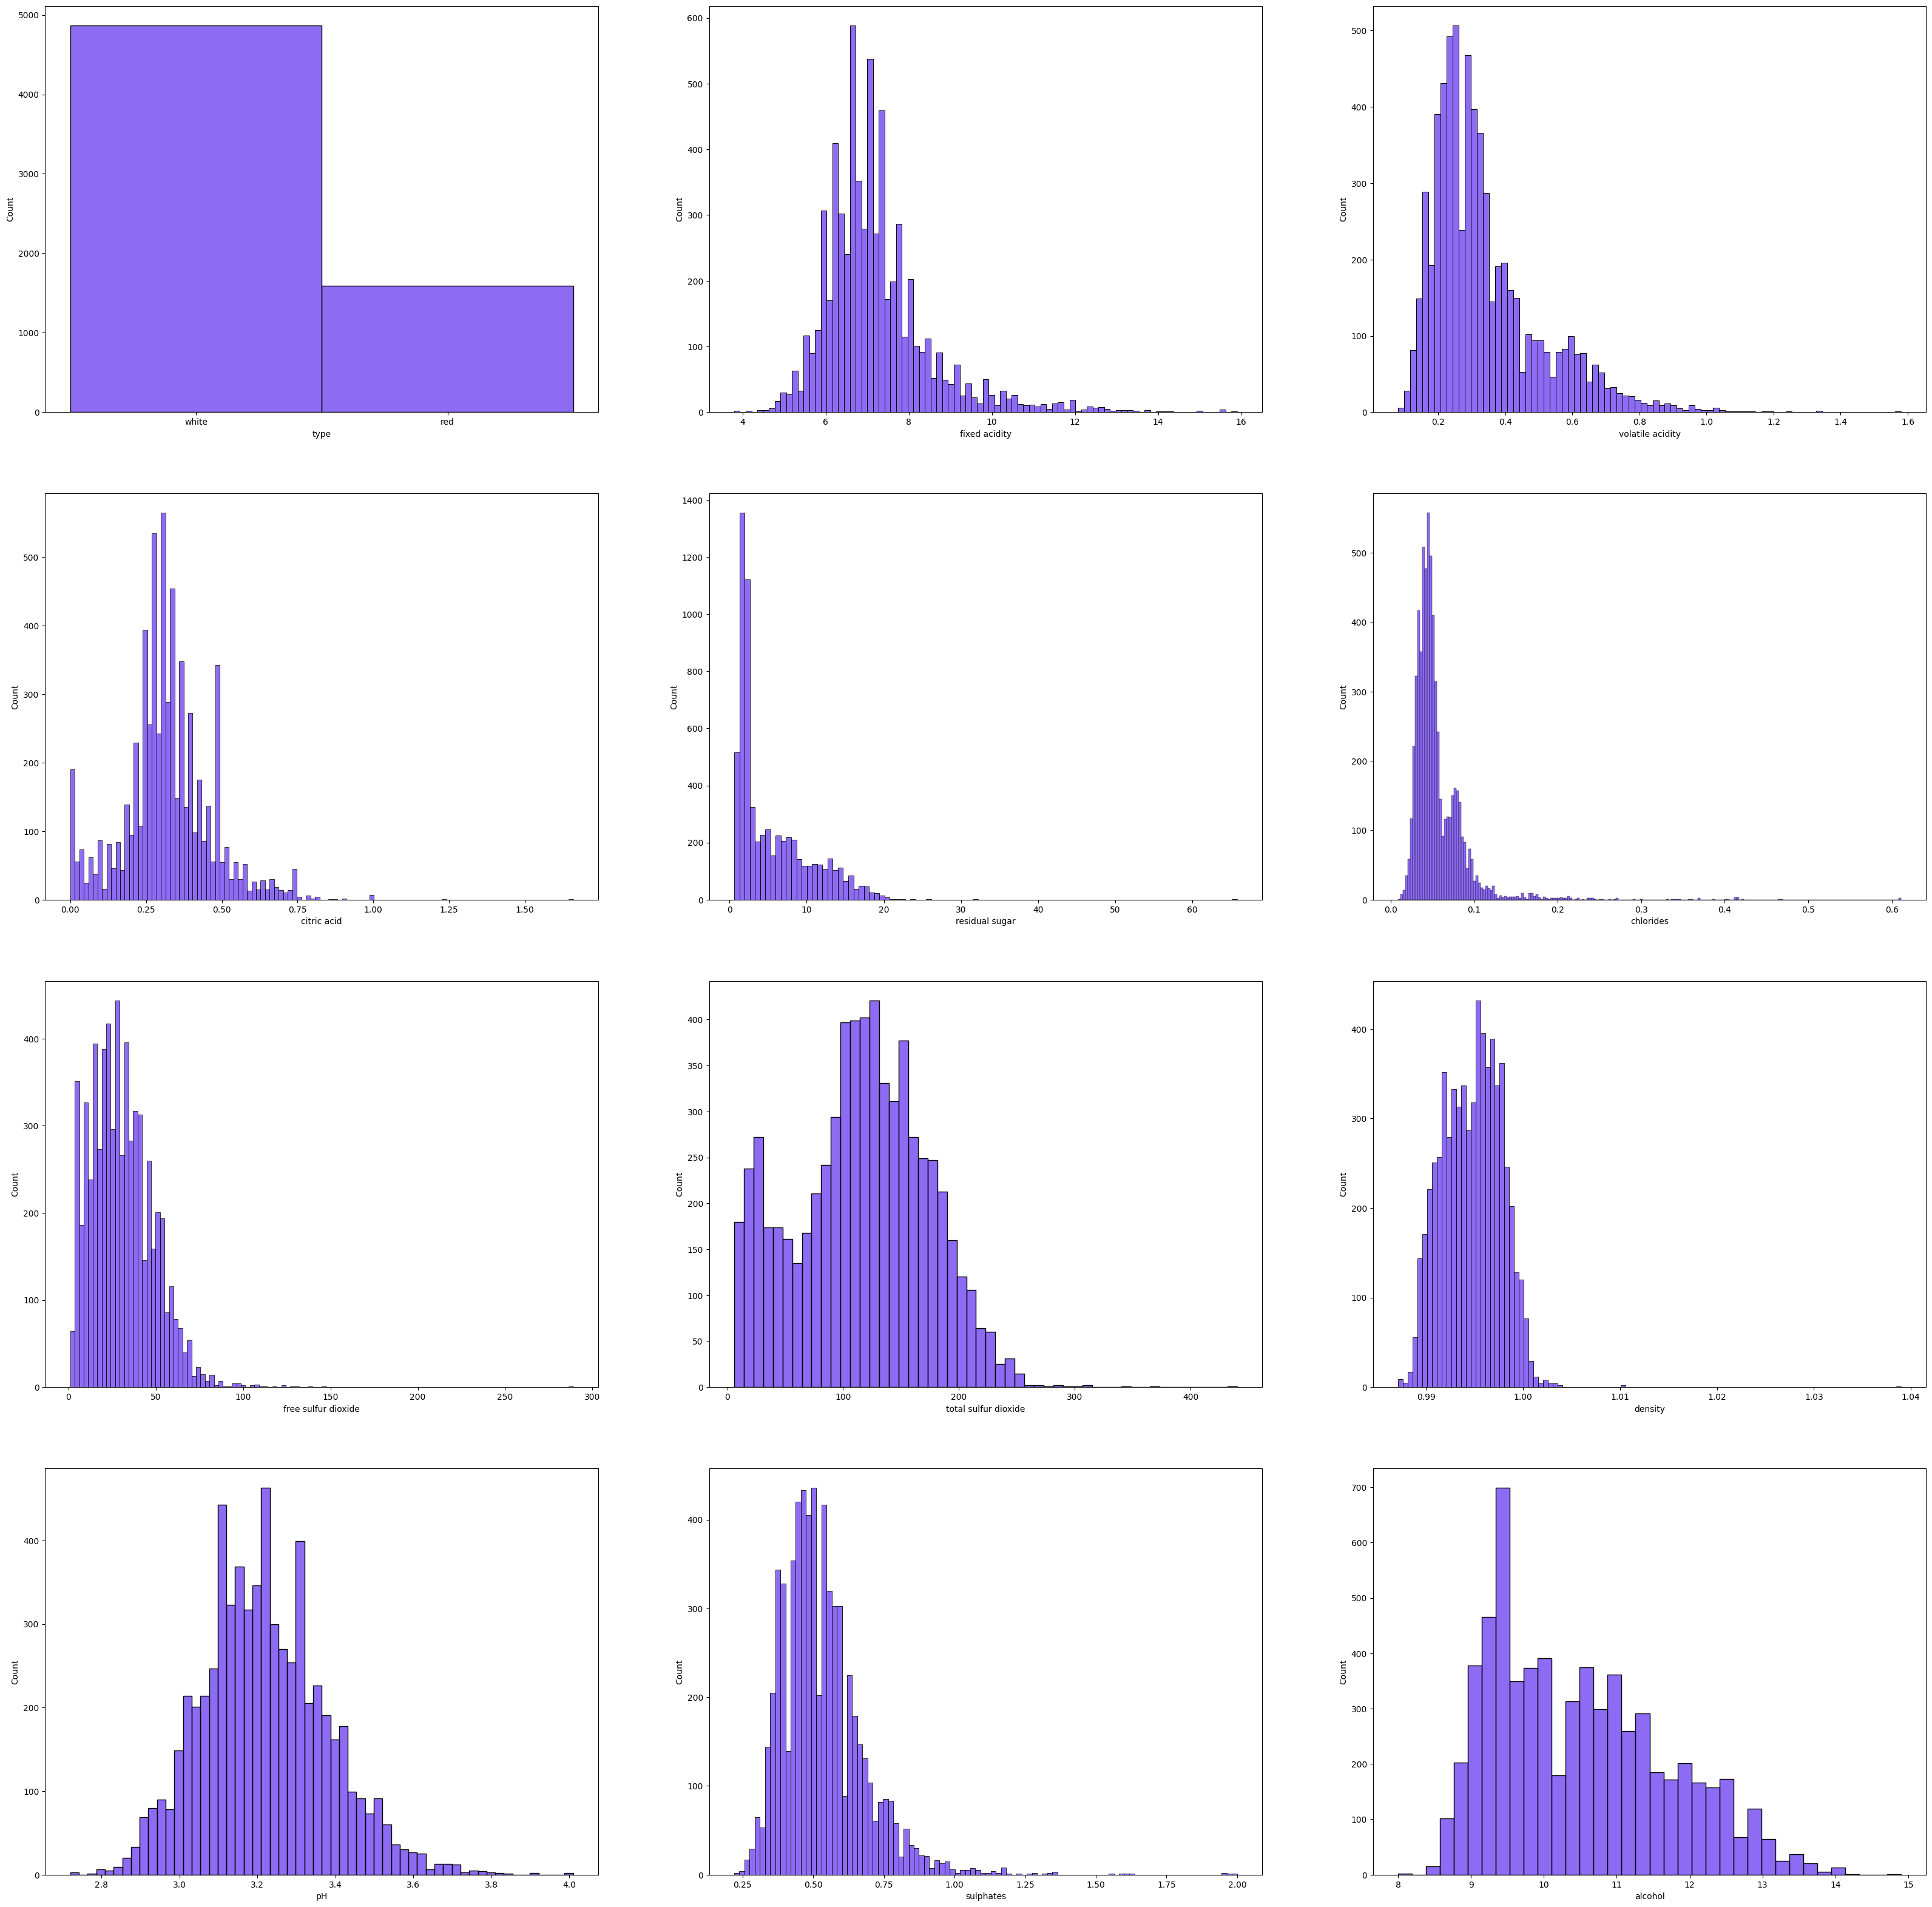

In [48]:
fig, axes = plt.subplots(4,3, figsize=(40,40))
axes = axes.ravel()
k = 0
for i in df.columns:
    sns.histplot(data=df, x=i, ax=axes[k], color="#673af0")
    k += 1 
fig.suptitle("Distribution plot for each feature", fontsize=40)
fig.tight_layout();

## Histogram

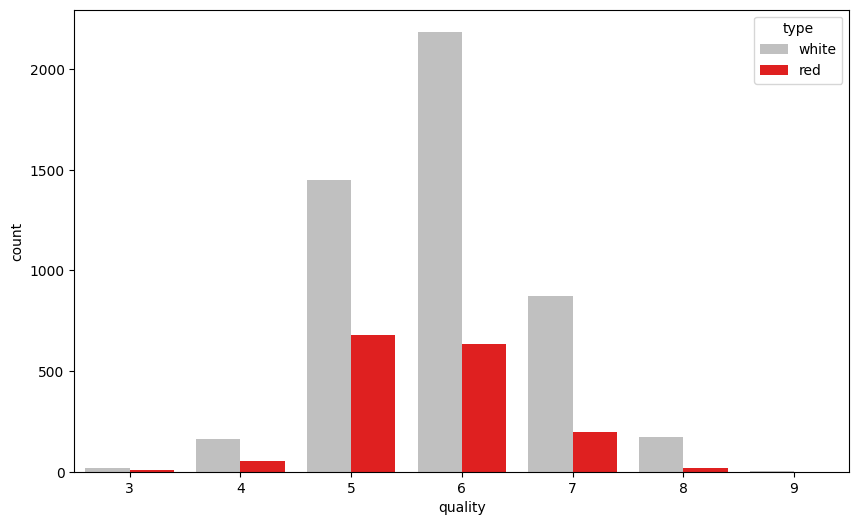

In [60]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(x = 'quality', hue = 'type', data = df, palette=['silver',"red"])
plt.show()

## Correlation Matrix

/var/folders/p2/r9k2xnqj3_b2t4r4g4wcp8_40000gn/T/ipykernel_76192/2238596787.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


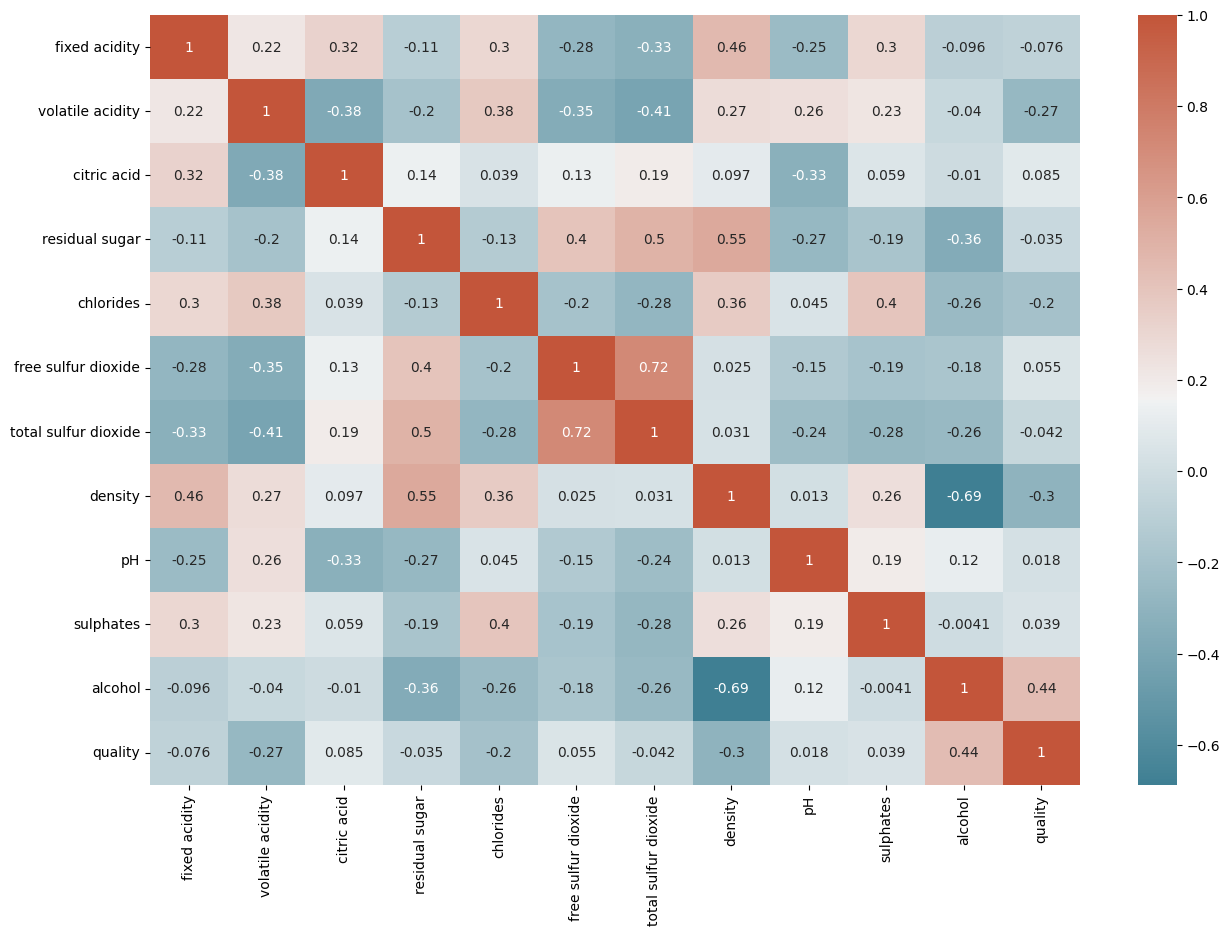

In [61]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True));

### Labeling wine type's

In [62]:
le = preprocessing.LabelEncoder()
df['type'] = le.fit_transform(df.type.values)
df['type']

0       1
1       1
2       1
3       1
4       1
       ..
6491    0
6492    0
6494    0
6495    0
6496    0
Name: type, Length: 6463, dtype: int64

### Converting to Classification

In [63]:
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]

X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

quality_count = df['goodquality'].value_counts()
quality_count
# 0 -> Not good, 1 -> Good quality

0    5192
1    1271
Name: goodquality, dtype: int64

In [64]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


## Standardizing Feature Variables

In [65]:
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

## Splitting data

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', X_test.shape)
print('Testing Features Shape:', y_train.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (4847, 12)
Training Labels Shape: (1616, 12)
Testing Features Shape: (4847,)
Testing Labels Shape: (1616,)


## Model 1: 
### All features / Default Parameters

In [67]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr.fit(X_train,y_train)
Y_pred_logr=logr.predict(X_test)
print(classification_report(y_test, Y_pred_logr))
print('Accuracy Score: {}'.format(round(accuracy_score(y_test, Y_pred_logr),4)))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      1315
           1       0.51      0.21      0.29       301

    accuracy                           0.82      1616
   macro avg       0.68      0.58      0.59      1616
weighted avg       0.78      0.82      0.78      1616

Accuracy Score: 0.8156


In [68]:
from sklearn.svm import SVC

svm = SVC(kernel="rbf")
svm.fit(X_train,y_train)
Y_pred_svm=svm.predict(X_test)
print(classification_report(y_test, Y_pred_svm))
print('Accuracy Score: {}'.format(round(accuracy_score(y_test, Y_pred_svm),4)))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1315
           1       0.67      0.26      0.37       301

    accuracy                           0.84      1616
   macro avg       0.76      0.61      0.64      1616
weighted avg       0.82      0.84      0.81      1616

Accuracy Score: 0.8379


In [69]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy Score: {}'.format(round(accuracy_score(y_test, y_pred),4)))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1315
           1       0.78      0.50      0.61       301

    accuracy                           0.88      1616
   macro avg       0.84      0.73      0.77      1616
weighted avg       0.87      0.88      0.87      1616

Accuracy Score: 0.88


## Feature importances

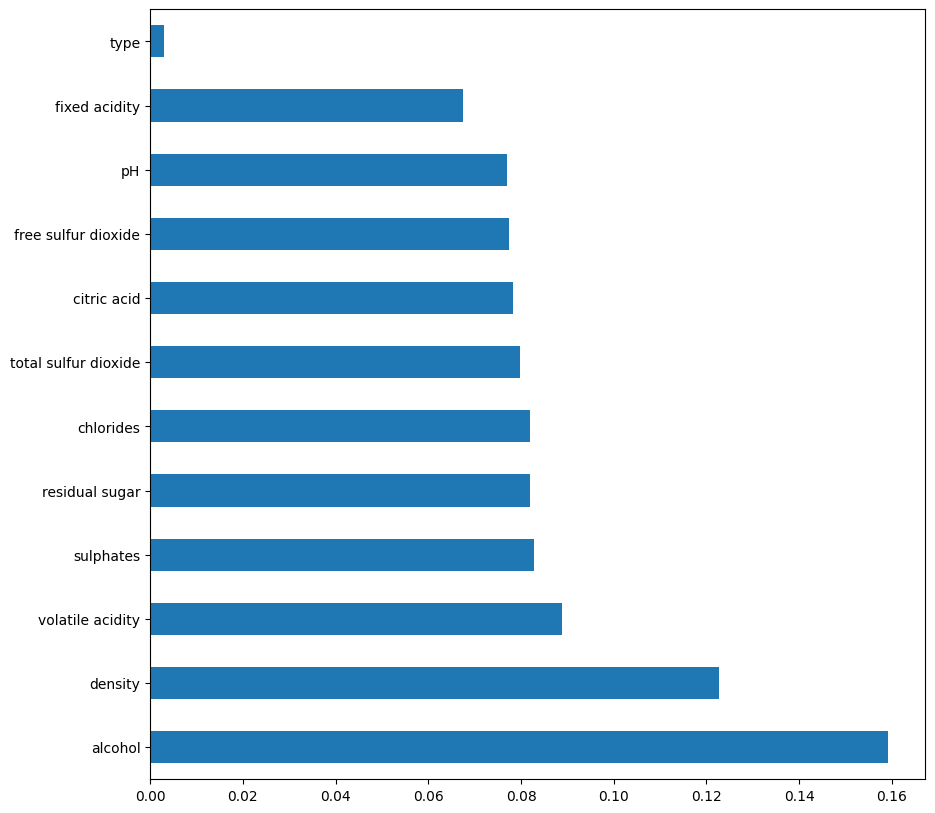

In [70]:
feat_importances = pd.Series(model.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10));

### Printing important features by order

In [71]:
importances = list(model.feature_importances_)
feature_list = list(X_features)
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: alcohol              Importance: 0.159
Variable: density              Importance: 0.123
Variable: volatile acidity     Importance: 0.089
Variable: sulphates            Importance: 0.083
Variable: residual sugar       Importance: 0.082
Variable: chlorides            Importance: 0.082
Variable: total sulfur dioxide Importance: 0.08
Variable: citric acid          Importance: 0.078
Variable: free sulfur dioxide  Importance: 0.077
Variable: pH                   Importance: 0.077
Variable: fixed acidity        Importance: 0.067
Variable: type                 Importance: 0.003


[None, None, None, None, None, None, None, None, None, None, None, None]

## Model 2: 
### Important features / Default Parameters

### Extracting important features

In [72]:
important_feature_names = [feature[0] for feature in feature_importances[0:5]]
important_indices = [feature_list.index(feature) for feature in important_feature_names]

important_feature_names

['alcohol', 'density', 'volatile acidity', 'sulphates', 'residual sugar']

In [73]:
important_train_features = X_train[:, important_indices]

### New X,y values

In [74]:
important_feature_names = [feature[0] for feature in feature_importances[0:6]]
important_indices = [feature_list.index(feature) for feature in important_feature_names]

important_X_train = X_train[:, important_indices]
important_X_test = X_test[:, important_indices]

print('Important train features shape:', important_X_train.shape)
print('Important test features shape:', important_X_test.shape)

Important train features shape: (4847, 6)
Important test features shape: (1616, 6)


### Fitting model

In [75]:
model2 = RandomForestClassifier(random_state=0)
model2.fit(important_X_train, y_train)
y_pred2 = model2.predict(important_X_test)
print(classification_report(y_test, y_pred2))
print('Accuracy Score: {}'.format(round(accuracy_score(y_test, y_pred2),4)))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1315
           1       0.76      0.51      0.61       301

    accuracy                           0.88      1616
   macro avg       0.83      0.74      0.77      1616
weighted avg       0.87      0.88      0.87      1616

Accuracy Score: 0.8793


In [76]:
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
print(rfc_eval)
print(rfc_eval.mean())


[0.91134021 0.8742268  0.90515464 0.88041237 0.85360825 0.8742268
 0.88865979 0.90702479 0.85743802 0.87603306]
0.8828124733747977


## Model 3: (GridSearch)
### Default features / Optimal Parameters

In [77]:
rfc = RandomForestClassifier(random_state=0)
parameters = {
    "n_estimators":[1,2,3,4,5,10,25,50,100,250],
    "max_depth":[1,2,4,8,16,32,None]
}

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X_train,y_train.values.ravel())


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 4, 8, 16, 32, None],
                         'n_estimators': [1, 2, 3, 4, 5, 10, 25, 50, 100, 250]})

### Displaying GridSearch results.

In [78]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,4)} for the {params}')

display(cv)

Best parameters are: {'max_depth': 16, 'n_estimators': 250}


0.8 + or -0.0001 for the {'max_depth': 1, 'n_estimators': 1}
0.8 + or -0.0001 for the {'max_depth': 1, 'n_estimators': 2}
0.8 + or -0.0001 for the {'max_depth': 1, 'n_estimators': 3}
0.8 + or -0.0001 for the {'max_depth': 1, 'n_estimators': 4}
0.8 + or -0.0001 for the {'max_depth': 1, 'n_estimators': 5}
0.8 + or -0.0001 for the {'max_depth': 1, 'n_estimators': 10}
0.8 + or -0.0001 for the {'max_depth': 1, 'n_estimators': 25}
0.8 + or -0.0001 for the {'max_depth': 1, 'n_estimators': 50}
0.8 + or -0.0001 for the {'max_depth': 1, 'n_estimators': 100}
0.8 + or -0.0001 for the {'max_depth': 1, 'n_estimators': 250}
0.802 + or -0.0031 for the {'max_depth': 2, 'n_estimators': 1}
0.801 + or -0.0024 for the {'max_depth': 2, 'n_estimators': 2}
0.802 + or -0.0034 for the {'max_depth': 2, 'n_estimators': 3}
0.8 + or -0.0017 for the {'max_depth': 2, 'n_estimators': 4}
0.799 + or -0.0023 for the {'max_depth': 2, 'n_estimators': 5}
0.8 + or

### Fitting our parameters

In [79]:
model3 = RandomForestClassifier(max_depth = 16, n_estimators = 250, random_state=0)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))
print('Accuracy Score: {}'.format(round(accuracy_score(y_test, y_pred3),3)))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1315
           1       0.80      0.51      0.63       301

    accuracy                           0.89      1616
   macro avg       0.85      0.74      0.78      1616
weighted avg       0.88      0.89      0.88      1616

Accuracy Score: 0.886


## Model 4: (GridSearch)
### Important features / Optimal Parameters

In [80]:
model4 = RandomForestClassifier(max_depth = 16, n_estimators = 250, random_state=1)
model4.fit(important_X_train, y_train)
y_pred4 = model4.predict(important_X_test)
print(classification_report(y_test, y_pred4))
print('Accuracy Score: {}'.format(round(accuracy_score(y_test, y_pred4),3)))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1315
           1       0.74      0.51      0.61       301

    accuracy                           0.88      1616
   macro avg       0.82      0.74      0.77      1616
weighted avg       0.87      0.88      0.87      1616

Accuracy Score: 0.876


# All results

In [81]:
print('Default parameters: \n\nAccuracy Score (All features): {}'.format(round(accuracy_score(y_test, y_pred),3)))
print('Accuracy Score (Important features): {}'.format(round(accuracy_score(y_test, y_pred2),3)))
print('\nGridSearch parameters: \n\nAccuracy Score (All features): {}'.format(round(accuracy_score(y_test, y_pred3),3)))
print('Accuracy Score (Important features): {}'.format(round(accuracy_score(y_test, y_pred4),3)))

Default parameters: 

Accuracy Score (All features): 0.88
Accuracy Score (Important features): 0.879

GridSearch parameters: 

Accuracy Score (All features): 0.886
Accuracy Score (Important features): 0.876
